In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

## Attribute full names

* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables(FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH2O)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Consumption of alcohol (CALC)
* Transportation used (MTRANS)

In [46]:
columns = len(data.columns)
rows = len(data.index)
print("Rows: ", rows)  
print("Columns: ", columns)  

Rows:  2111
Columns:  17


In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data["Age"].var()

40.27131333121615

In [8]:
data.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
data.dtypes


Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [10]:
data.select_dtypes(include='object').sum()

Gender                            FemaleFemaleMaleMaleMaleMaleFemaleMaleMaleMale...
family_history_with_overweight    yesyesyesnononoyesnoyesyesyesyesnonoyesyesyesn...
FAVC                              nononononoyesyesnoyesyesyesyesnoyesyesnoyesyes...
CAEC                              SometimesSometimesSometimesSometimesSometimesS...
SMOKE                             noyesnonononononononononononononononoyesnonoye...
SCC                               noyesnononononononononoyesnononoyesnononononon...
CALC                              noSometimesFrequentlyFrequentlySometimesSometi...
MTRANS                            Public_TransportationPublic_TransportationPubl...
NObeyesdad                        Normal_WeightNormal_WeightNormal_WeightOverwei...
dtype: object

### 9 features which are not in numeric form, in the following step I will convert them to numeric values.


For gender we will assign `0 to Female` and `1 to Male`.

In [11]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

For all the following features we will be assingin `0 to yes` and `1 to no`:

* family_history_with_overweight
* FAVC
* SMOKE
* SCC

In [12]:
 data["family_history_with_overweight"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data["FAVC"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data["SMOKE"].unique()

array(['no', 'yes'], dtype=object)

In [15]:
data["SCC"].unique()

array(['no', 'yes'], dtype=object)

For CAEC and CALC we will use the below conventions:

 `no` = 0, 
 `Sometimes` = 1, 
 `Frequently` = 2, 
 `Always` = 3, 

In [16]:
data["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [17]:
data["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

For `MTRANS` we will use following scale to convert the categorical data to numerical data:

`Walking` = 0, `Bike` = 1, `Public_Transportation` = 2, `Motorbike` = 3, `Automobile` = 4

In [18]:
data["MTRANS"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

For `NObeyesdad` we will use following scale to convert the categorical data to numerical data:

`Insufficient_Weight`= 0, `Normal_Weight`= 1, `Overweight_Level_I`= 2, `Overweight_Level_II`= 3, `Obesity_Type_I`= 4, `Obesity_Type_II`= 5, `Obesity_Type_III` = 6

In [19]:
data["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

## Converting data type from Categorical and Binary to Numeric 

In [20]:
data["Gender"] = data["Gender"].replace(["Female", "Male"], [0, 1])


In [21]:
data["family_history_with_overweight"] = data["family_history_with_overweight"].replace(["yes", "no"], [0, 1])
data["FAVC"] = data["FAVC"].replace(["yes", "no"], [0, 1])
data["SMOKE"] = data["SMOKE"].replace(["yes", "no"], [0, 1])
data["SCC"] = data["SCC"].replace(["yes", "no"], [0, 1])

In [22]:
data["CAEC"]= data["CAEC"].replace(["no", "Sometimes", "Frequently", "Always"], [0, 1, 2, 3])
data["CALC"] = data["CALC"].replace(["no", "Sometimes", "Frequently", "Always"], [0, 1, 2, 3])

In [23]:
data["MTRANS"] = data["MTRANS"].replace(["Walking", "Bike", "Public_Transportation", "Motorbike", "Automobile"],
                                        [0, 1, 2, 3, 4])

In [24]:
data["NObeyesdad"] = data["NObeyesdad"].replace(["Insufficient_Weight","Normal_Weight","Overweight_Level_I", "Overweight_Level_II",
                                                "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"],
                                               [0, 1, 2, 3, 4, 5, 6])


*All features in Numeric form*

In [25]:
data.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [26]:
data.to_csv("data/Obesity-Data-PreProcessed.csv")
#saving maham preprossesd file. Easy to share.

In [27]:
transformed_data = pd.read_csv("data/Obesity-Data-PreProcessed.csv")
transformed_data_1 = transformed_data.drop(transformed_data.columns[0] , axis =1)
transformed_data_1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,0,1,2.0,3.0,1,1,2.0,1,0.0,1.0,0,2,1
1,0,21.0,1.52,56.0,0,1,3.0,3.0,1,0,3.0,0,3.0,0.0,1,2,1
2,1,23.0,1.80,77.0,0,1,2.0,3.0,1,1,2.0,1,2.0,1.0,2,2,1
3,1,27.0,1.80,87.0,1,1,3.0,3.0,1,1,2.0,1,2.0,0.0,2,0,2
4,1,22.0,1.78,89.8,1,1,2.0,1.0,1,1,2.0,1,0.0,0.0,1,2,3


In [28]:
# normalized_df = transformed_data_1/ transformed_data_1.mean()
# normalized_df.head()
# from sklearn.feature_selection import VarianceThreshold
# vt = VarianceThreshold(threshold=(.8 * (1 - .8)))  
# _ = vt.fit(normalized_df)
# mask = vt.get_support()
# transformed_data_1_final = transformed_data_1.loc[:, mask]
# # transformed_data_1_final.shape, transformed_data_1.shape
# transformed_data_1_final.head()
# transformed_data

## selected features after feature selection:
* Gender
* family_history_with_overweight
* Frequent consumption of high caloric food (FAVC)
* Consumption of food between meals (CAEC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Consumption of alcohol (CALC)
* NObeyesdad

In [29]:
normalized_df=(transformed_data_1-transformed_data_1.min())/(transformed_data_1.max()-transformed_data_1.min())
normalized_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.148936,0.320755,0.186567,0.0,1.0,0.5,0.666667,0.333333,1.0,0.5,1.0,0.000000,0.5,0.000000,0.5,0.166667
1,0.0,0.148936,0.132075,0.126866,0.0,1.0,1.0,0.666667,0.333333,0.0,1.0,0.0,1.000000,0.0,0.333333,0.5,0.166667
2,1.0,0.191489,0.660377,0.283582,0.0,1.0,0.5,0.666667,0.333333,1.0,0.5,1.0,0.666667,0.5,0.666667,0.5,0.166667
3,1.0,0.276596,0.660377,0.358209,1.0,1.0,1.0,0.666667,0.333333,1.0,0.5,1.0,0.666667,0.0,0.666667,0.0,0.333333
4,1.0,0.170213,0.622642,0.379104,1.0,1.0,0.5,0.000000,0.333333,1.0,0.5,1.0,0.000000,0.0,0.333333,0.5,0.500000


In [30]:
from sklearn.feature_selection import VarianceThreshold
# vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt = VarianceThreshold(threshold=0.08)
_ = vt.fit(normalized_df)
mask = vt.get_support()
transformed_data_1_final = normalized_df.loc[:, mask]
transformed_data_1_final.shape, normalized_df.shape

((2111, 7), (2111, 17))

In [31]:
transformed_data_1_final.head(2)

,Gender,family_history_with_overweight,FAVC,CH2O,FAF,TUE,NObeyesdad
0,0.0,0.0,1.0,0.5,0.0,0.5,0.166667
1,0.0,0.0,1.0,1.0,1.0,0.0,0.166667


In [32]:
y = normalized_df[["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]]
x = normalized_df[["Age", "Weight", "Height", "CH2O","FCVC", "NCP" , "CAEC", "FAF", "TUE", "CALC", "MTRANS","NObeyesdad"]]


In [33]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold= 0.003)
_ = vt.fit(x)
mask = vt.get_support()
transformed_data_1_final = x.loc[:, mask]
x.shape, transformed_data_1.shape

((2111, 12), (2111, 17))

In [34]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
_ = vt.fit(y)
mask = vt.get_support()
transformed_data_1_final = y.loc[:, mask]
y.shape, transformed_data_1.shape

((2111, 5), (2111, 17))

In [35]:
x.var(), y.var()

(Age           0.018231
 Weight        0.038203
 Height        0.030992
 CH2O          0.093928
 FCVC          0.071269
 NCP           0.067260
 CAEC          0.024393
 FAF           0.080390
 TUE           0.092698
 CALC          0.029526
 MTRANS        0.052200
 NObeyesdad    0.109458
 dtype: float64,
 Gender                            0.250083
 family_history_with_overweight    0.149187
 FAVC                              0.102638
 SMOKE                             0.020418
 SCC                               0.043429
 dtype: float64)

### Feature selction with LinearSVC

In [41]:
X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.0015, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
#print(model.get_support()) 
print(X.columns[model.get_support()])
#selected_feature_names = np.asarray(lsvc.get_feature_names())[list(set(np.where(svc.coef_ != 0)[1]))]
#select=np.where(lsvc.coef_ != 0)[-1]
# SMOKE, SCC
X_new.shape
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

Index(['Gender', 'Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF'], dtype='object')


C:\Users\smart\Desktop\maham_machine_learning_project1\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


 ## Tree-based feature selection

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X.shape
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)            
print(X.columns[model.get_support()])
X_new.shape   


Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC'], dtype='object')


C:\Users\smart\Desktop\maham_machine_learning_project1\env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(2111, 5)

In the next step I will run:
* multiple linear regression for selected features.
* multiple linear regression for all features.
* R2 value for selected and all features
* coefficient of the 4 variable 

## Multiple Linear Regression

1. Taking all the 16 labels and 1 target.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(2)

X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)

print(
  'mean_squared_error : ', mean_squared_error(y_test, y_preds))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_preds))
print(
  'r2_score : ', mean_absolute_error(y_test, y_preds))
score = model.score(X_test, y_test)#Return the coefficient of determination of the prediction?)
score

mean_squared_error :  0.22643941987646335
mean_absolute_error :  0.3567887692800068
r2_score :  0.3567887692800068


0.9437950441145229

### 2. Doing Linear Regression only on 4 features selected with Tree-based feature selection and LinearSVC.

In [41]:
np.random.seed(2)

X = transformed_data_1[['Gender', 'Age', 'Weight', 'FCVC']]
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(
  'mean_squared_error : ', mean_squared_error(y_test, y_preds))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_preds))
print(
  'r2_score : ', mean_absolute_error(y_test, y_preds))
score = model.score(X_test, y_test)
score

mean_squared_error :  0.5373488486322676
mean_absolute_error :  0.5872337454496004
r2_score :  0.5872337454496004


0.8666236278605314

## Training Random Forset Classifier on all features

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(2)

X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test, y_test)


0.9432624113475178

## Random Forest Classifier on selcted features

In [43]:
np.random.seed(2)

X = transformed_data_1[['Gender', 'Age', 'Weight', 'FCVC']]
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
score = model.score(X_test, y_test)
score

0.8723404255319149

## KNeighborsClassifier on selected features

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)

X = transformed_data_1[['Gender', 'Age', 'Weight', 'FCVC']]
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))


Accuracy: 0.85
Confusion Matrix: 
 [[55  4  0  0  0  0  0]
 [ 9 31  9  3  0  0  0]
 [ 1  1 47  2  0  0  0]
 [ 1  2  5 45 11  2  0]
 [ 0  0  1  6 52  4  1]
 [ 0  0  0  1  0 67  1]
 [ 0  0  0  0  0  0 62]]


#### In following step I will perform 10-fold cross-validation for each odd value of 'k' from 1 to 49, then select the 'k' that had the highest cross-validation accuracy.

In [45]:
from sklearn.model_selection import cross_val_score

# Creating odd list K for KNN
neighbors = list(range(1,50,2))

# Empty list to hold cv scores
cv_scores = []

# Perform 10-fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determining the best K
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 1


In [46]:
# Accuarcy score with optimal n_negibours

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=1)

X = transformed_data_1[['Gender', 'Age', 'Weight', 'FCVC']]
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.88
Confusion Matrix: 
 [[49  2  1  0  0  0  0]
 [ 7 35  6  1  0  0  0]
 [ 0  6 46  2  0  0  0]
 [ 0  2  6 44  6  1  0]
 [ 0  0  0  5 77  1  0]
 [ 0  0  0  0  5 58  1]
 [ 0  0  0  0  0  0 62]]


## KNeighborsClassifier on all fetaures

In [47]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)

X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.90
Confusion Matrix: 
 [[66  0  0  0  0  0  0]
 [ 8 22  5  4  0  0  0]
 [ 0  3 57  5  2  0  0]
 [ 0  0  6 50  3  0  0]
 [ 0  0  0  0 67  2  2]
 [ 0  0  0  0  1 55  1]
 [ 0  0  0  0  0  1 63]]


In [48]:
np.random.seed(3)

knn = KNeighborsClassifier(n_neighbors=1)

X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix: 
 [[48  1  1  0  0  0  0]
 [ 7 32 11  6  1  0  0]
 [ 0  2 53  3  1  0  0]
 [ 0  1  1 58  2  1  0]
 [ 0  0  0  3 67  1  2]
 [ 0  0  0  0  2 58  1]
 [ 0  0  0  0  0  0 60]]


In [49]:
# even for all features optimal number is 1
from sklearn.model_selection import cross_val_score

# Creating odd list K for KNN
neighbors = list(range(1,50,2))

# Empty list to hold cv scores
cv_scores = []

# Perform 10-fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determining the best K
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 1


## SVM on all features

In [50]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X = transformed_data_1.drop("NObeyesdad", axis = 1)
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.87
Confusion Matrix: 
 [[61  0  0  0  0  0  0]
 [ 7 31  7  0  0  0  0]
 [ 0  4 49  7  1  0  0]
 [ 0  0  7 45  8  0  0]
 [ 0  0  1  7 67  4  0]
 [ 0  0  0  0  1 53  0]
 [ 0  0  0  0  0  0 63]]


## SVM on selected features

In [51]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X = transformed_data_1[['Gender', 'Age', 'Weight', 'FCVC']]
y = transformed_data_1["NObeyesdad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = svm.SVC(kernel='linear')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 0.73
Confusion Matrix: 
 [[51 10  0  0  0  0  0]
 [ 9 26  6  4  0  0  0]
 [ 0 10 28 20  3  0  0]
 [ 0  1  9 32 18  0  0]
 [ 0  0  1 10 56 12  0]
 [ 0  0  0  0  3 51  0]
 [ 0  0  0  0  0  0 63]]


The optimal number of neighbors is 1


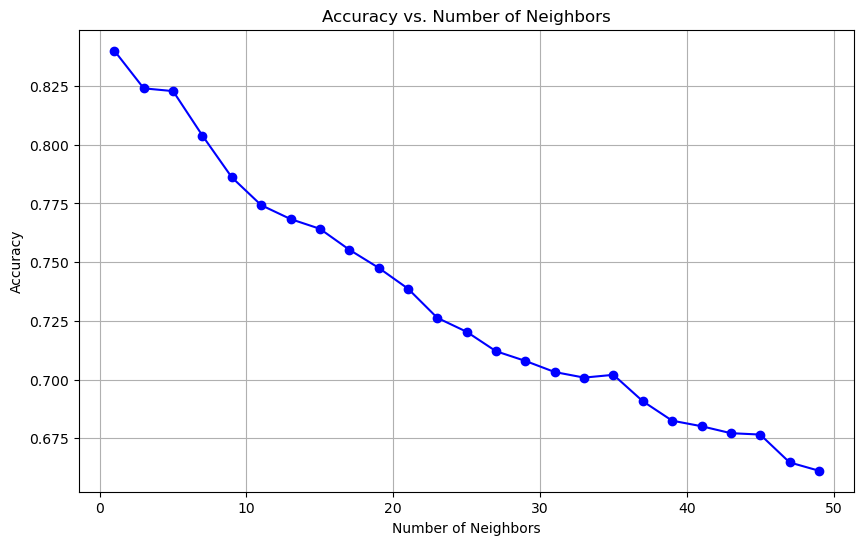

In [53]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Creating odd list K for KNN
neighbors = list(range(1, 50, 2))

# Empty list to hold cv scores
cv_scores = []

# Perform 10-fold cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determining the best K
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

# Plot accuracy vs. number of neighbors
plt.figure(figsize=(10,6))
plt.plot(neighbors, cv_scores, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [56]:
import pandas as pd
from IPython.display import display, HTML
# List of models
models = ['KNN', 'SVM', 'Random Forest', 'Linear Regression']

# Accuracies for selected features (replace with your actual values)
accuracy_selected = [0.88, 0.73, 0.87, 0.86]

# Accuracies for all features (replace with your actual values)
accuracy_all = [0.89, 0.87, 0.94, 0.94]

# Create a DataFrame
df = pd.DataFrame(list(zip(models, accuracy_selected, accuracy_all)), 
               columns =['Models', 'Accuracy for selected features', 'Accuracy for all features'])

# Display DataFrame as a table with lines
display(HTML(df.to_html(index=False, table_id='table', border=1)))

Models,Accuracy for selected features,Accuracy for all features
KNN,0.88,0.89
SVM,0.73,0.87
Random Forest,0.87,0.94
Linear Regression,0.86,0.94


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming X is your feature set and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=optimal_k)  # Use your optimal_k value

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Create a DataFrame for comparison
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(df)


      Actual  Predicted
544        0          1
1987       6          6
420        0          0
527        0          0
196        1          2
...      ...        ...
893        2          2
188        4          5
1814       6          6
869        2          2
1428       4          4

[212 rows x 2 columns]


In [58]:
# Export DataFrame to CSV
df.to_csv('results.csv', index=False)

In [59]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.8962264150943396
